# Hyundai Datasets Analysis

In [107]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go

In [108]:
import os
for dirname, _, filenames in os.walk('/home/sakthi/Downloads/Hyundai/csvs'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/sakthi/Downloads/Hyundai/csvs/Analytics_Hyundai-Oct-2020.csv


In [109]:
df = pd.read_csv('/home/sakthi/Downloads/Hyundai/csvs/Analytics_Hyundai-Oct-2020.csv')
df.tail(30)

,Body No,Standard Date,Paint Cnt,Part Content,Defect Desc,Repair Content,Location,Inspector,Type,Color,Shift
12,B4B 079222,28-09-2020,1,RR DR LH OTR,Sealer pulling,NaN,"2,2",Gopalakrishnan,Offline,PWT,Evening Shift(15:30~00:00)
13,B4B 079222,28-09-2020,1,RR DR LH OTR,Sealer pulling,NaN,"3,2",Gopalakrishnan,Offline,PWT,Evening Shift(15:30~00:00)
14,B4B 079223,29-09-2020,1,RR DR LH OTR,Damage,NaN,"2,2",Hariharan,Offline,PWT,Day Shift(07:00~15.30)
15,B4B 079224,28-09-2020,1,RR DR LH OTR,Sealer Pulling,NaN,"2,2",Gokulraj,Offline,PWT,Evening Shift(15:30~00:00)
16,B4B 079232,23-09-2020,1,RR DR LH OTR,Sealer Pulling,NaN,"2,2",Gokulraj,Offline,TTB,Night Shift(00:00~7:00)
17,B4F 401704,2/9/2020,1,T/LID PNL OTR,Insect cm,STS(Spot Repair),"3,1",Prashanth,Offline,PWT,Night Shift(00:00~7:00)
18,B4F 401706,2/9/2020,1,FRT DR RH OTR,Sealer Pulling,NaN,"1,2",Prashanth,Offline,PWT,Night Shift(00:00~7:00)
19,B4F 401706,2/9/2020,1,FRT DR RH OTR,Sealer Pulling,NaN,"2,2",Prashanth,Offline,PWT,Night Shift(00:00~7:00)
20,B4F 401707,5/9/2020,1,FRT DR RH OTR,Bpr pad damage,STS(Spot Repair),"1,2",Prashanth,Offline,PWT,Night Shift(00:00~7:00)
21,B4F 401707,5/9/2020,1,FRT DR RH OTR,Bpr pad damage,STS(Spot Repair),"2,2",Prashanth,Offline,PWT,Night Shift(00:00~7:00)


In [110]:
len(df)

42

In [111]:
df.dtypes

Body No           object
Standard Date     object
Paint Cnt          int64
Part Content      object
Defect Desc       object
Repair Content    object
Location          object
Inspector         object
Type              object
Color             object
Shift             object
dtype: object

In [112]:
df['Defect Desc'] = df['Defect Desc'].replace('Sealer pulling','Sealer Pulling')
df['Defect Desc'] = df['Defect Desc'].replace('Pin holes','Pin Hole')
df['Standard Date'] = df['Standard Date'].str.replace('-','/')

In [150]:
crowd = df['Standard Date'].value_counts().to_frame().reset_index()
crowd.columns = ["date","dense"]
crowd

,date,dense
0,3/9/2020,7
1,28/09/2020,6
2,2/9/2020,5
3,5/9/2020,5
4,12/9/2020,4
5,6/9/2020,4
6,4/9/2020,4
7,11/9/2020,2
8,27/09/2020,2
9,15/09/2020,1


##### Servicing dates and No.of services done in respective dates


In [175]:
fig = go.Figure(data=[go.Pie(labels=crowd.date, values=crowd.dense, hole=.3)])
fig.show()

##### Services in Respective dates

In [115]:
cars = df.groupby(['Standard Date','Body No']).size().to_frame()
cars=cars.reset_index()
cars.columns = ['Date','BodyNo','Occurence']
#cars = cars.drop(['Occurence'], axis = 1)
cars

,Date,BodyNo,Occurence
0,11/9/2020,B4B 079115,1
1,11/9/2020,B4B 079162,1
2,12/9/2020,B4B 079163,1
3,12/9/2020,B4B 079175,1
4,12/9/2020,B4B 079176,1
5,12/9/2020,B4B 079182,1
6,15/09/2020,B4B 079170,1
7,2/9/2020,B4F 401704,1
8,2/9/2020,B4F 401706,2
9,2/9/2020,B4F 401733,1


In [152]:
fig = px.sunburst(cars,path=["Date", "BodyNo"])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

##### Vehicle serviced on respective dates identified with body number.

In [117]:
vehicle = df.groupby(['Body No','Location']).size().to_frame()
#vehicle = vehicle.reset_index()
vehicle.columns = ['Occured for Service']
vehicle

,,Occured for Service
Body No,Location,
B4B 079115,"1,2",1
B4B 079162,"1,2",1
B4B 079163,"1,2",1
B4B 079170,"2,2",1
B4B 079175,"2,2",1
B4B 079176,"2,2",1
B4B 079182,"3,5",1
B4B 079213,"2,2",1
B4B 079214,"1,4",1


In [118]:
in_count = df['Body No'].value_counts().to_frame()
in_count['vehicle'] = in_count.index

In [153]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=in_count['vehicle'],y=in_count["Body No"],mode='lines+markers',name='lines'))
fig.show()

##### Body number arrived for replacement a lot

In [154]:
df['Defect Desc'].value_counts()

Sealer Pulling           11
Wavy                      7
Pin Hole                  5
Lint                      3
Line Bulge                2
Bpr pad damage            2
ED Oilmark                2
Touch Mark                1
Damage                    1
Contamination             1
Cutmark                   1
Insect cm                 1
Base visible              1
Surface contamination     1
Dent                      1
Base Out                  1
Sealer Contamination      1
Name: Defect Desc, dtype: int64

For which defect servicing is done frequently. ie) **Sealer Pulling is serviced 11 times**

In [121]:
parts = df.groupby(['Defect Desc','Part Content']).size().to_frame().reset_index()

In [155]:
fig = px.sunburst(parts,path=["Defect Desc", "Part Content"])
fig.show()
fig2 = go.Figure(go.Sunburst(
    labels  = fig['data'][0]['labels'].tolist(),
    parents = fig['data'][0]['parents'].tolist(),
    values  = fig['data'][0]['values'].tolist(),
    ids     = fig['data'][0]['ids'].tolist(),
    domain  = {'x': [0.0, 1.0], 'y': [0.0, 1.0]}
))
fig2.show()

##### Body parts serviced for their respective issues

In [156]:
df.groupby(["Defect Desc","Part Content"]).size().sort_values(ascending=False)

Defect Desc            Part Content  
Sealer Pulling         RR DR LH OTR      9
Wavy                   RR DR RH OTR      5
Pin Hole               FRT DR RH OTR     5
Bpr pad damage         FRT DR RH OTR     2
Sealer Pulling         FRT DR RH OTR     2
Line Bulge             RR DR LH OTR      2
ED Oilmark             FRT DR RH OTR     1
Base visible           SIDE RH OTR       1
Contamination          SIDE LH OTR       1
Cutmark                SIDE LH OTR       1
Damage                 RR DR LH OTR      1
Dent                   SIDE LH OTR       1
ED Oilmark             FENDER LH OTR     1
Lint                   RR DR LH OTR      1
Insect cm              T/LID PNL OTR     1
Wavy                   RR  DR RH OTR     1
Lint                   SIDE LH OTR       1
                       T/LID PNL OTR     1
Sealer Contamination   ROOF LH           1
Surface contamination  RR DR LH OTR      1
Touch Mark             RR DR LH OTR      1
Wavy                   FRT DR RH OTR     1
Base Out        

On replacing defective parts, **which Part Content used frequently** ie) **RR DR LH OTR part is used 9 times for replacing Sealer Pulling issue,while FRT DR RH OTR is used 2 times**

In [124]:
replaced = df.groupby(["Defect Desc","Part Content"]).size().to_frame().reset_index()
replaced.columns = ['Defect Desc','Part Content','Replacement']
replaced

,Defect Desc,Part Content,Replacement
0,Base Out,T/GATE PNL OTR,1
1,Base visible,SIDE RH OTR,1
2,Bpr pad damage,FRT DR RH OTR,2
3,Contamination,SIDE LH OTR,1
4,Cutmark,SIDE LH OTR,1
5,Damage,RR DR LH OTR,1
6,Dent,SIDE LH OTR,1
7,ED Oilmark,FENDER LH OTR,1
8,ED Oilmark,FRT DR RH OTR,1
9,Insect cm,T/LID PNL OTR,1


In [224]:
fig = px.bar(replaced, x="Part Content", y="Replacement",color="Defect Desc") 
fig.show()

##### Frequency of Part Content arrived for servicing specific issue

In [157]:
df.groupby(['Defect Desc','Part Content'])['Paint Cnt'].sum()

Defect Desc            Part Content  
Base Out               T/GATE PNL OTR    1
Base visible           SIDE RH OTR       1
Bpr pad damage         FRT DR RH OTR     2
Contamination          SIDE LH OTR       1
Cutmark                SIDE LH OTR       1
Damage                 RR DR LH OTR      1
Dent                   SIDE LH OTR       1
ED Oilmark             FENDER LH OTR     1
                       FRT DR RH OTR     1
Insect cm              T/LID PNL OTR     1
Line Bulge             RR DR LH OTR      2
Lint                   RR DR LH OTR      1
                       SIDE LH OTR       1
                       T/LID PNL OTR     1
Pin Hole               FRT DR RH OTR     5
Sealer Contamination   ROOF LH           1
Sealer Pulling         FRT DR RH OTR     2
                       RR DR LH OTR      9
Surface contamination  RR DR LH OTR      1
Touch Mark             RR DR LH OTR      1
Wavy                   FRT DR RH OTR     2
                       RR  DR RH OTR     1
                

On servicing specific part, **paint count is calculated**

In [158]:
df.Inspector.value_counts()

Prashanth         17
Gopalakrishnan     9
Gokulraj           7
Hariharan          3
Arun               2
Jegadeesh          2
Ajith              1
Ajith kumar        1
Name: Inspector, dtype: int64

Inspectors contribution on servicing. **Inspector Prashanth has contributed lot on servicing**

In [128]:
df.groupby(['Inspector','Shift']).size().sort_values(ascending=False)

Inspector       Shift                     
Prashanth       Night Shift(00:00~7:00)       17
Gopalakrishnan  Evening Shift(15:30~00:00)     7
Gokulraj        Evening Shift(15:30~00:00)     4
                Night Shift(00:00~7:00)        3
Jegadeesh       Evening Shift(15:30~00:00)     2
Hariharan       Evening Shift(15:30~00:00)     2
Gopalakrishnan  Night Shift(00:00~7:00)        2
Arun            Evening Shift(15:30~00:00)     2
Hariharan       Day Shift(07:00~15.30)         1
Ajith kumar     Evening Shift(15:30~00:00)     1
Ajith           Evening Shift(15:30~00:00)     1
dtype: int64

In [159]:
df.groupby(['Inspector','Shift']).size().to_frame()


0
Inspector      Shift                         
Ajith          Evening Shift(15:30~00:00)   1
Ajith kumar    Evening Shift(15:30~00:00)   1
Arun           Evening Shift(15:30~00:00)   2
Gokulraj       Evening Shift(15:30~00:00)   4
               Night Shift(00:00~7:00)      3
Gopalakrishnan Evening Shift(15:30~00:00)   7
               Night Shift(00:00~7:00)      2
Hariharan      Day Shift(07:00~15:30)       1
               Evening Shift(15:30~00:00)   2
Jegadeesh      Evening Shift(15:30~00:00)   2
Prashanth      Night Shift(00:00~7:00)     17

On inspecting the Inspector column, we able to see that **Prashanth has worked for maximum hours and Gokulraj, Gopalakrishnan, Hariharan has worked on two shifts and Hariharan is the only one worked on Dayshift**

In [130]:
shifts = df.groupby(['Shift','Inspector']).size().to_frame()
shifts

0
Shift                      Inspector         
Day Shift(07:00~15.30)     Hariharan        1
Evening Shift(15:30~00:00) Ajith            1
                           Ajith kumar      1
                           Arun             2
                           Gokulraj         4
                           Gopalakrishnan   7
                           Hariharan        2
                           Jegadeesh        2
Night Shift(00:00~7:00)    Gokulraj         3
                           Gopalakrishnan   2
                           Prashanth       17

In [131]:
shifts = shifts.reset_index()
shifts.columns = ['Shift', 'Inspector','No.of Shifts']
shifts

,Shift,Inspector,No.of Shifts
0,Day Shift(07:00~15.30),Hariharan,1
1,Evening Shift(15:30~00:00),Ajith,1
2,Evening Shift(15:30~00:00),Ajith kumar,1
3,Evening Shift(15:30~00:00),Arun,2
4,Evening Shift(15:30~00:00),Gokulraj,4
5,Evening Shift(15:30~00:00),Gopalakrishnan,7
6,Evening Shift(15:30~00:00),Hariharan,2
7,Evening Shift(15:30~00:00),Jegadeesh,2
8,Night Shift(00:00~7:00),Gokulraj,3
9,Night Shift(00:00~7:00),Gopalakrishnan,2


In [160]:

fig = px.sunburst(shifts,path=["Shift", "Inspector"])

fig.show()

##### Persons working in repective shifts are analysed

In [133]:
df['Shift'] = df['Shift'].str.replace('.', ':')
df.Shift

0     Evening Shift(15:30~00:00)
1     Evening Shift(15:30~00:00)
2        Night Shift(00:00~7:00)
3     Evening Shift(15:30~00:00)
4     Evening Shift(15:30~00:00)
5     Evening Shift(15:30~00:00)
6     Evening Shift(15:30~00:00)
7        Night Shift(00:00~7:00)
8     Evening Shift(15:30~00:00)
9     Evening Shift(15:30~00:00)
10    Evening Shift(15:30~00:00)
11       Night Shift(00:00~7:00)
12    Evening Shift(15:30~00:00)
13    Evening Shift(15:30~00:00)
14        Day Shift(07:00~15:30)
15    Evening Shift(15:30~00:00)
16       Night Shift(00:00~7:00)
17       Night Shift(00:00~7:00)
18       Night Shift(00:00~7:00)
19       Night Shift(00:00~7:00)
20       Night Shift(00:00~7:00)
21       Night Shift(00:00~7:00)
22    Evening Shift(15:30~00:00)
23    Evening Shift(15:30~00:00)
24       Night Shift(00:00~7:00)
25    Evening Shift(15:30~00:00)
26    Evening Shift(15:30~00:00)
27       Night Shift(00:00~7:00)
28       Night Shift(00:00~7:00)
29    Evening Shift(15:30~00:00)
30    Even

In [161]:
def series_to_frame(sf,col_1,col_2):
    frames = pd.DataFrame({col_1:sf.index, col_2:sf.values})
    return frames

In [165]:
sf = df.Inspector.value_counts()
inspect = series_to_frame(sf,'Inspector','Count')
inspect

,Inspector,Count
0,Prashanth,17
1,Gopalakrishnan,9
2,Gokulraj,7
3,Hariharan,3
4,Arun,2
5,Jegadeesh,2
6,Ajith,1
7,Ajith kumar,1


In [167]:
fig = go.Figure(data=[go.Pie(labels=inspect.Inspector, values=inspect.Count, hole=.3)])
fig.show()

##### Inspector contribution on servicing body parts 

In [164]:
fig = px.pie(inspect, values = 'Count', names = 'Inspector', title = 'Inspectors Contribution',
             hover_data = ['Inspector'], labels = {'index':'Name'})

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

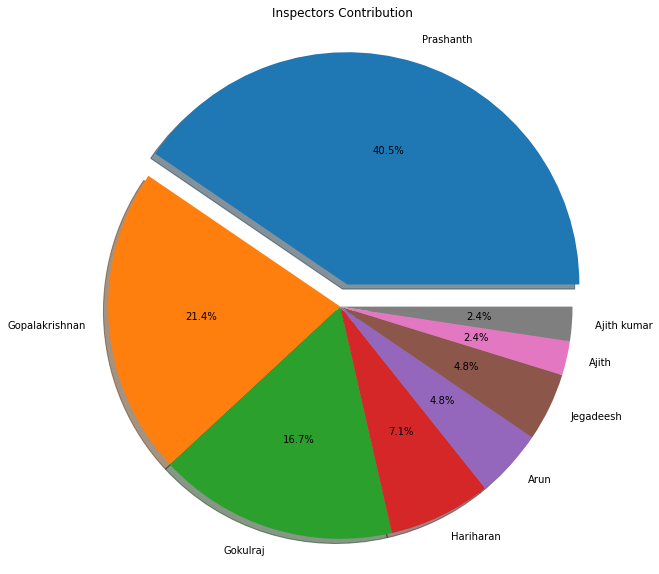

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

my_labels = inspect.Inspector
plt.pie(inspect.Count,labels=my_labels,autopct='%1.1f%%',shadow=True,explode=(0.1,0,0,0,0,0,0,0))
plt.title('Inspectors Contribution')
plt.axis('equal')
plt.show()

In [139]:
series2 = df['Defect Desc'].value_counts()
defect_parts = series_to_frame(series2,'Defect Desc','Frequency')
defect_parts.dtypes

Defect Desc    object
Frequency       int64
dtype: object

In [168]:
fig = px.bar(defect_parts, x = 'Defect Desc', y = 'Frequency', color = 'Frequency', labels = {'index':'Frequency'}, height=550, text = 'Frequency')

fig.update_traces(texttemplate='%{text}', textposition='outside')

fig.show()

##### Frequent services for specific problem

In [141]:
fig = px.bar(defect_parts, x='Defect Desc', y='Frequency',title='Frequent defects serviced')
fig.show()

In [142]:
def hours(s):
    s = s.replace(")", "")
    s = s.split("(")[1]
    if (s == "15:30~00:00"):
        return 8.5
    elif (s == "00:00~7:00"):
        return 7
    else:
        return 8.5
df["Hours"] = df["Shift"].apply(hours)

In [143]:
df.head(30)

,Body No,Standard Date,Paint Cnt,Part Content,Defect Desc,Repair Content,Location,Inspector,Type,Color,Shift,Hours
0,B4B 079115,11/9/2020,1,FENDER LH OTR,ED Oilmark,Touchup,"1,2",Gopalakrishnan,Offline,PWT,Evening Shift(15:30~00:00),8.5
1,B4B 079162,11/9/2020,1,T/GATE PNL OTR,Base Out,STS(Spot Repair),"1,2",Ajith,Offline,PWT,Evening Shift(15:30~00:00),8.5
2,B4B 079163,12/9/2020,1,RR DR LH OTR,Surface contamination,STS(Spot Repair),"1,2",Gopalakrishnan,Offline,PWT,Night Shift(00:00~7:00),7.0
3,B4B 079170,15/09/2020,1,RR DR LH OTR,Sealer Pulling,STS(Spot Repair),"2,2",Gopalakrishnan,Offline,PWT,Evening Shift(15:30~00:00),8.5
4,B4B 079175,12/9/2020,1,RR DR LH OTR,Line Bulge,Touchup,"2,2",Gopalakrishnan,Offline,PWT,Evening Shift(15:30~00:00),8.5
5,B4B 079176,12/9/2020,1,RR DR LH OTR,Line Bulge,Touchup,"2,2",Gopalakrishnan,Offline,PWT,Evening Shift(15:30~00:00),8.5
6,B4B 079182,12/9/2020,1,SIDE LH OTR,Contamination,STS(Spot Repair),"3,5",Gopalakrishnan,Offline,PWT,Evening Shift(15:30~00:00),8.5
7,B4B 079213,27/09/2020,1,RR DR LH OTR,Sealer Pulling,NaN,"2,2",Gokulraj,Offline,PWT,Night Shift(00:00~7:00),7.0
8,B4B 079214,28/09/2020,1,RR DR LH OTR,Sealer Pulling,NaN,"2,2",Gokulraj,Offline,PWT,Evening Shift(15:30~00:00),8.5
9,B4B 079214,28/09/2020,1,SIDE LH OTR,Lint,NaN,"1,4",Gokulraj,Offline,PWT,Evening Shift(15:30~00:00),8.5


In [144]:
dates = df['Standard Date'].value_counts().to_frame()
dates = dates.reset_index()
dates.columns = ["Dates","Occurences"]

In [169]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(dates.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[dates.Dates, dates.Occurences],
               fill_color='lightcyan',
               align='left'))
])
fig.show() 

On which specific date the Servicing is booked a lot ie.) **On 3/9/2020 the service booking is 7(at max).**

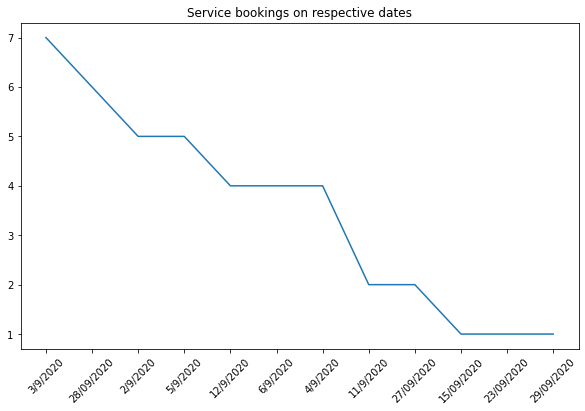

In [146]:
plt.figure(figsize = (10,6))
plt.xticks(rotation=45)
plt.title('Service bookings on respective dates')
plt.plot(df['Standard Date'].value_counts())

In [170]:
df.groupby('Inspector')['Hours'].sum().sort_values(ascending=False)

Inspector
Prashanth         119.0
Gopalakrishnan     73.5
Gokulraj           55.0
Hariharan          25.5
Jegadeesh          17.0
Arun               17.0
Ajith kumar         8.5
Ajith               8.5
Name: Hours, dtype: float64

**No.of Hours Inspectors have worked.**

In [148]:
people = pd.DataFrame({'Hours' : df.groupby('Inspector')['Hours'].sum().sort_values(ascending=False)}).reset_index()

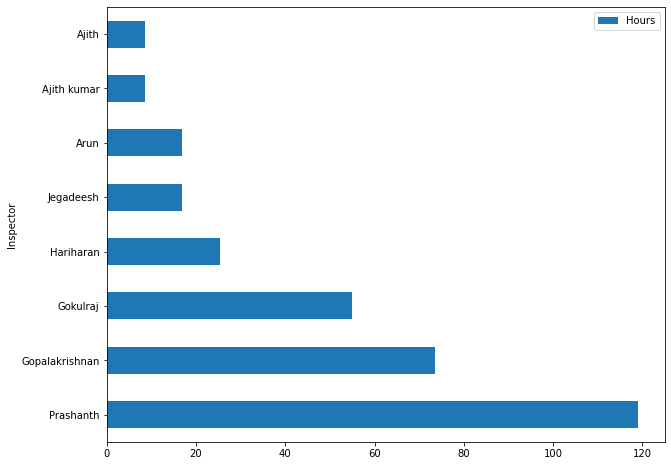

In [149]:
people = people.set_index('Inspector')
people.plot(kind='barh',figsize=(10,8))

In [187]:
df.groupby(["Standard Date","Inspector"])["Hours"].sum()

Standard Date  Inspector     
11/9/2020      Ajith              8.5
               Gopalakrishnan     8.5
12/9/2020      Gopalakrishnan    32.5
15/09/2020     Gopalakrishnan     8.5
2/9/2020       Arun               8.5
               Jegadeesh          8.5
               Prashanth         21.0
23/09/2020     Gokulraj           7.0
27/09/2020     Gokulraj          14.0
28/09/2020     Gokulraj          34.0
               Gopalakrishnan    17.0
29/09/2020     Hariharan          8.5
3/9/2020       Ajith kumar        8.5
               Hariharan         17.0
               Jegadeesh          8.5
               Prashanth         21.0
4/9/2020       Arun               8.5
               Gopalakrishnan     7.0
               Prashanth         14.0
5/9/2020       Prashanth         35.0
6/9/2020       Prashanth         28.0
Name: Hours, dtype: float64

In [203]:
fig = px.sunburst(df, path=['Inspector','Standard Date','Hours']) 
fig.show()

##### Inspector working for how many hours in respective dates

In [173]:
fig = px.scatter_3d(df, x='Standard Date', y='Inspector', z='Hours')
fig.show()

##### Inspectors working hours in respective dates

In [177]:
df.groupby('Defect Desc')["Hours"].sum()

Defect Desc
Base Out                  8.5
Base visible              8.5
Bpr pad damage           14.0
Contamination             8.5
Cutmark                   7.0
Damage                    8.5
Dent                      8.5
ED Oilmark               17.0
Insect cm                 7.0
Line Bulge               17.0
Lint                     25.5
Pin Hole                 36.5
Sealer Contamination      7.0
Sealer Pulling           86.0
Surface contamination     7.0
Touch Mark                8.5
Wavy                     49.0
Name: Hours, dtype: float64

In [181]:
fig = go.Figure(data=[go.Pie(labels=df["Defect Desc"], values=df.Hours, hole=.3)])
fig.show()

##### Time spent for servicing which problem

In [186]:
fig = px.sunburst(df,path=["Standard Date", "Defect Desc"])
fig2 = go.Figure(go.Sunburst(
    labels  = fig['data'][0]['labels'].tolist(),
    parents = fig['data'][0]['parents'].tolist(),
    values  = fig['data'][0]['values'].tolist(),
    ids     = fig['data'][0]['ids'].tolist(),
    domain  = {'x': [0.0, 1.0], 'y': [0.0, 1.0]}
))
fig2.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig2.show()

##### Issues reported on respective dates